# Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

### Get the data as a pandas Dataframe

In [2]:
# importing the data
energy = pd.read_csv("./energy.csv", sep = ",")

energy.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
8215,2019-12-09T07:00:00.000+01:00,27087.9,5842.7,4929.5,6.3,4330.3,956.3,8143.8,43.48
6544,2019-09-30T17:00:00.000+02:00,31477.0,6882.4,10617.7,2649.9,1558.0,710.0,2734.5,47.98
2641,2019-04-21T02:00:00.000+02:00,20112.4,7027.6,2065.8,NaN,1506.0,330.0,6793.4,30.23
7085,2019-10-23T06:00:00.000+02:00,24676.4,5987.1,6338.5,0.6,1522.5,1332.1,7316.8,40.70
7372,2019-11-04T04:00:00.000+01:00,20254.9,4991.4,1270.8,NaN,1316.0,442.0,13471.2,5.95


### Calculate the following

#### Shape (1 p)

In [3]:
energy.shape

(8737, 9)

#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [4]:
# use filter or list comprehensions or for loops or dark magic

features = energy.filter(["power_demand", "nuclear", "gas", "solar", "hydro", "coal", "wind", "spot_price"])

In [5]:
# creating features as a list
energy_columns = energy.columns
features1 = list(filter(lambda col: "datetime" not in col, energy_columns))
features1

['power_demand',
 'nuclear',
 'gas',
 'solar',
 'hydro',
 'coal',
 'wind',
 'spot_price']

#### How many NaN are there in the dataset? (1 p)

In [6]:
# "Dealing with missing values" in the slides

print("There is", energy.isna().stack().sum(), "NaN in the dataset")

There is 2541 NaN in the dataset


#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [7]:
# pandas datetime functionalities

energy["datetime"] = pd.to_datetime(energy["datetime"], utc = True)  # convert date from string to date

# I could have made it a series, but I prefer to have it in my same dataframe
# datetim3 = pd.to_datetime(energy["datetime"], utc = True)

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [8]:
# creating time related variables

energy["year"] = energy["datetime"].map(lambda x: x.year)
energy["month"] = energy["datetime"].map(lambda x: x.month)
energy["day"] = energy["datetime"].map(lambda x: x.day)
energy["hour"] = energy["datetime"].map(lambda x: x.hour)
energy["weekday"] = energy["datetime"].map(lambda x: x.weekday())

#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [9]:
# using list comprehensions
energy["weekend"] = np.where(energy["weekday"] < 5, 0, 1)
energy["weekend"].sum().sum()

2496

In [10]:
# using map + lambda functions
energy["weekend"] = energy["weekday"].map(lambda x: 1*(x>4))
energy["weekend"].sum().sum()

2496

#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [11]:
# when features is a list

energy.groupby("weekday")[features1].mean().round(2)

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.58,6390.91,6483.54,1382.90,2919.92,1282.02,5846.82,49.24
1,29760.26,6391.13,6716.40,1400.60,2870.55,1478.38,5795.67,50.20
2,29814.90,6399.61,6448.10,1386.10,2856.42,1444.20,6451.17,48.81
3,29913.13,6408.19,6404.80,1396.43,2904.32,1364.83,6452.39,48.82
4,29587.51,6404.23,6362.18,1437.46,3027.98,1294.99,6071.20,48.79
5,26545.26,6325.36,4965.32,1418.78,2604.20,1057.80,5826.92,45.43
6,24759.38,6353.42,4089.48,1373.88,2439.53,912.08,6061.22,42.65


In [12]:
# When features is not a list
weekday = energy["weekday"]

features_weekday = pd.concat([weekday, features], axis=1)

features_weekday.groupby("weekday").mean().round(2)

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.58,6390.91,6483.54,1382.90,2919.92,1282.02,5846.82,49.24
1,29760.26,6391.13,6716.40,1400.60,2870.55,1478.38,5795.67,50.20
2,29814.90,6399.61,6448.10,1386.10,2856.42,1444.20,6451.17,48.81
3,29913.13,6408.19,6404.80,1396.43,2904.32,1364.83,6452.39,48.82
4,29587.51,6404.23,6362.18,1437.46,3027.98,1294.99,6071.20,48.79
5,26545.26,6325.36,4965.32,1418.78,2604.20,1057.80,5826.92,45.43
6,24759.38,6353.42,4089.48,1373.88,2439.53,912.08,6061.22,42.65


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [13]:
# function to extract season from date
def get_season(date_to_convert):
    year = date_to_convert.year
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("winter", date(year, 1, 1), date(year, 3, 20)),
        ("spring", date(year, 3, 21), date(year, 6, 20)),
        ("summer", date(year, 6, 21), date(year, 9, 20)),
        ("fall", date(year, 9, 21), date(year, 12, 20))
    ]
    
    for season in seasons:
        if date_to_convert>=season[1] and date_to_convert<=season[2]:
            return season[0]
        
energy["season"] = energy["datetime"].map(get_season)

#### Calculate average demand and spot_price for each season (1 p)

In [14]:
energy.groupby("season")[["power_demand", "spot_price"]].mean().round(2)

,power_demand,spot_price
season,,
fall,28212.96,43.51
spring,27112.77,48.81
summer,29269.89,46.60
winter,29482.94,52.00


#### Why are there so many NaN values in the "solar" column? (0.5 p - extra)

There are 2392 missing values in the solar column


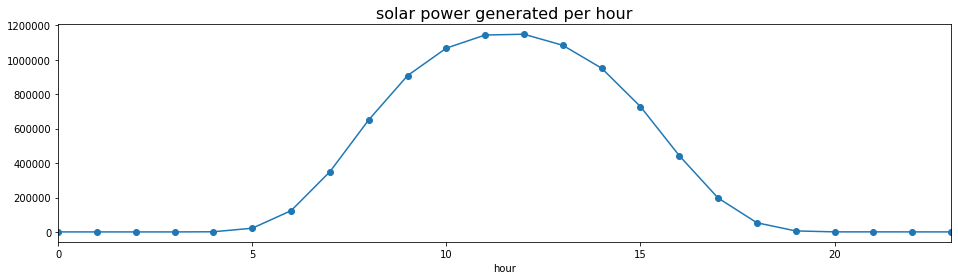

In [15]:
print("There are", energy["solar"].isna().sum(), "missing values in the solar column")

# calculate hourly total production for solar generation
plt.tight_layout()
plt.title("solar power generated per hour", fontdict = {"fontsize": 16, "fontweight": 1}, loc = "center")
energy.groupby("hour").sum()["solar"].plot(figsize=(16, 4), marker = "o")
plt.show()

The reason for that much NaN values is due to day/night times. 

#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [16]:
# Income = energy_generated * price

in_cost = {}
type_generation = [feature for feature in features if feature != "spot_price"]

for col in type_generation:
    in_cost[col] = np.sum(energy[col] * energy["spot_price"])
    
in_cost

# Cost = energy_bought * price



{'power_demand': 12115827296.223999,
 'nuclear': 2674992442.1679997,
 'gas': 2577997502.639,
 'solar': 430157479.785,
 'hydro': 1179143190.696,
 'coal': 591516973.36,
 'wind': 2412917661.565}

#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

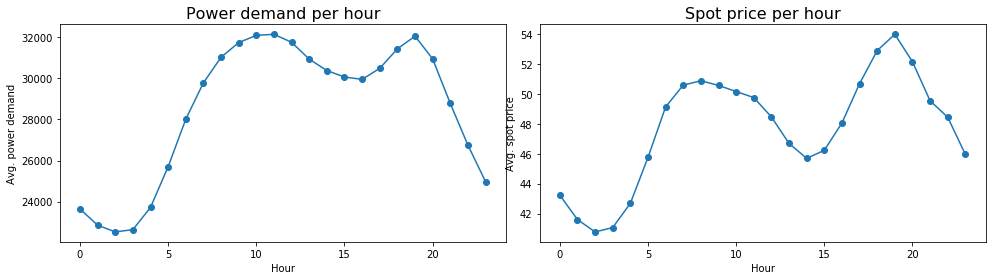

In [17]:
power_demand_per_hour = (
    energy
    .groupby("hour")
    .mean()
    .round(2)
    [["power_demand"]]
    .rename(columns={"power_demand": "total_demand"})
)

spot_price_per_hour = (
    energy
    .groupby("hour")
    .mean()
    .round(2)
    [["spot_price"]]
    .rename(columns={"spot_price": "total_price"})
)

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.tight_layout()
plt.title("Power demand per hour", fontdict = {"fontsize": 16, "fontweight": 1}, loc = "center")
plt.plot(power_demand_per_hour.index, power_demand_per_hour["total_demand"], marker = "o")
plt.xlabel("Hour")
plt.ylabel("Avg. power demand")


plt.subplot(1,2,2)
plt.tight_layout()
plt.title("Spot price per hour", fontdict = {"fontsize": 16, "fontweight": 1}, loc = "center")
plt.plot(spot_price_per_hour.index, spot_price_per_hour["total_price"], marker = "o")
plt.xlabel("Hour")
plt.ylabel("Avg. spot price")


plt.show()

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

In [18]:
energy["wind_category"] = pd.cut(
    energy["wind"],
    bins = [0, 6000, 12000, 18000],
    include_lowest = True,
    labels = ["low", "mid", "high"]
)

energy.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season,wind_category
3250,2019-05-16 09:00:00+00:00,31516.4,5078.8,8332.0,3023.4,3638.7,450.0,2540.7,55.89,2019,5,16,9,3,0,spring,low
3528,2019-05-27 23:00:00+00:00,23884.3,5072.7,4129.7,NaN,1725.1,535.0,7635.6,42.00,2019,5,27,23,0,0,spring,mid
5953,2019-09-06 00:00:00+00:00,24705.7,6935.1,3741.5,NaN,817.1,270.0,10170.5,27.90,2019,9,6,0,4,0,summer,mid
5194,2019-08-05 09:00:00+00:00,33908.2,6932.8,12074.4,3191.4,2829.9,715.0,429.0,51.79,2019,8,5,9,0,0,summer,low
6861,2019-10-13 20:00:00+00:00,25942.5,5936.9,4945.2,1.0,1862.9,695.0,7419.8,53.52,2019,10,13,20,6,1,fall,mid


#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [19]:
power_type = energy[["nuclear", "gas", "solar", "hydro", "coal", "wind"]]

In [20]:
print("The power generator type",power_type.sum().idxmax(), 
      "has generated the most energy out of all power generator types.")

The power generator type nuclear has generated the most energy out of all power generator types.


In [21]:
print("The power generator type",power_type.sum().idxmin(), 
      "has generated the least energy out of all power generator types.")

The power generator type solar has generated the least energy out of all power generator types.
